# Finanzas Computacionales
## Proyecto grupal
### Profesor: Dr. Luis Vicente Montiel Cendejas
### Estudiante: Marina, Aldair y Eduardo
### Fecha de entrega: 23 de Mayo de 2022

# Resumen

Uno de los objetivos de este proyecto es ...

In [1]:
import numpy as np
import pandas as pd # librería para manejo de dataframes
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # librería para descarga de históricos de Yahoo Finance
import math

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [2]:
ticker = 'AAPL'
fecha_inicio = '2021-01-01'
fecha_fin = '2022-04-30'

In [3]:
def funcion_etiqueta(x):
    if x<=0:
        y = -1
    else:
        y = 1
    return(y)

def funcion_encoding(x):
    if x == -1:
        y = 0
    else:
        y = 1
    return(y)

In [4]:
def descarga_historico(ticker, fecha_inicio, fecha_fin):
    df_hist = yf.download(ticker, start = fecha_inicio, end = fecha_fin, progress=False)
    df = df_hist.iloc[1:]['Close']
    df = df.to_frame()
    return(df)

In [5]:
descarga_historico(ticker, fecha_inicio, fecha_fin)

,Close
Date,
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
2021-01-08,132.050003
2021-01-11,128.979996
...,...
2022-04-25,162.880005
2022-04-26,156.800003
2022-04-27,156.570007


In [6]:
df = descarga_historico(ticker, fecha_inicio, fecha_fin)

In [7]:
df_diferencia = df['Close'] - df.shift(1)['Close']
df_diferencia = df_diferencia.to_frame()
df_diferencia['etiqueta'] = df_diferencia['Close'].apply(funcion_etiqueta)
df_etiq = df_diferencia['etiqueta']
df_etiq = df_etiq.to_frame()
    #return(df)
df_etiq

,etiqueta
Date,
2021-01-05,1
2021-01-06,-1
2021-01-07,1
2021-01-08,1
2021-01-11,-1
...,...
2022-04-25,1
2022-04-26,-1
2022-04-27,-1


In [8]:
def construye_etiquetas(ticker, fecha_inicio, fecha_fin):
    df = descarga_historico(ticker, fecha_inicio, fecha_fin)
    df_diferencia = df['Close'] - df.shift(1)['Close']
    df_diferencia = df_diferencia.to_frame()
    df_diferencia['etiqueta'] = df_diferencia['Close'].apply(funcion_etiqueta)
    df_etiq = df_diferencia['etiqueta']
    df_etiq = df_etiq.to_frame()
    df_etiq['etiqueta_binaria'] = df_etiq['etiqueta'].apply(funcion_encoding)
    return(df_etiq)

In [9]:
construye_etiquetas(ticker, fecha_inicio, fecha_fin)

,etiqueta,etiqueta_binaria
Date,,
2021-01-05,1,1
2021-01-06,-1,0
2021-01-07,1,1
2021-01-08,1,1
2021-01-11,-1,0
...,...,...
2022-04-25,1,1
2022-04-26,-1,0
2022-04-27,-1,0


In [10]:
df = construye_etiquetas(ticker, fecha_inicio, fecha_fin)

In [11]:
frecuencias = df['etiqueta'].value_counts()
frecuencias

 1    170
-1    163
Name: etiqueta, dtype: int64

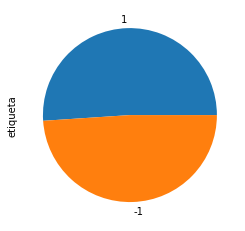

In [12]:
frecuencias.plot(kind='pie');

In [13]:
df = descarga_historico(ticker, fecha_inicio, fecha_fin)
df

,Close
Date,
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
2021-01-08,132.050003
2021-01-11,128.979996
...,...
2022-04-25,162.880005
2022-04-26,156.800003
2022-04-27,156.570007


In [14]:
df['moving_avg'] = df['Close'].rolling(10).mean()

In [15]:
ponder = np.arange(1,11)
df['uma10'] = df['Close'].rolling(10).apply(lambda precios: np.dot(precios, ponder)/ponder.sum(), raw=True)
df

,Close,moving_avg,uma10
Date,,,
2021-01-05,131.009995,NaN,NaN
2021-01-06,126.599998,NaN,NaN
2021-01-07,130.919998,NaN,NaN
2021-01-08,132.050003,NaN,NaN
2021-01-11,128.979996,NaN,NaN
...,...,...,...
2022-04-25,162.880005,165.988998,165.273816
2022-04-26,156.800003,165.093999,163.603090
2022-04-27,156.570007,163.984999,162.053273


In [16]:
def prom_mov_uma(df, m): #m es el valor del rolling 
    df['moving_avg'] = df['Close'].rolling(10).mean()
    ponder = np.arange(1,11)
    df['uma10'] = df['Close'].rolling(10).apply(lambda precios: np.dot(precios, ponder)/ponder.sum(), raw=True)
    return(df)

In [17]:
m = 10
prom_mov_uma(df, m)

,Close,moving_avg,uma10
Date,,,
2021-01-05,131.009995,NaN,NaN
2021-01-06,126.599998,NaN,NaN
2021-01-07,130.919998,NaN,NaN
2021-01-08,132.050003,NaN,NaN
2021-01-11,128.979996,NaN,NaN
...,...,...,...
2022-04-25,162.880005,165.988998,165.273816
2022-04-26,156.800003,165.093999,163.603090
2022-04-27,156.570007,163.984999,162.053273


In [18]:
df_etiquetas = construye_etiquetas(ticker, fecha_inicio, fecha_fin)
df_indicadores = prom_mov_uma(df, m)

In [19]:
df_ml = pd.merge(df_etiquetas, df_indicadores, left_index=True, right_index=True)
df_ml = df_ml.dropna()

In [20]:
df_ml

,etiqueta,etiqueta_binaria,Close,moving_avg,uma10
Date,,,,,
2021-01-19,1,1,127.830002,129.313000,128.962546
2021-01-20,1,1,132.029999,129.415000,129.456546
2021-01-21,1,1,136.869995,130.442000,130.812000
2021-01-22,1,1,139.070007,131.257001,132.380728
2021-01-25,1,1,142.919998,132.344000,134.501273
...,...,...,...,...,...
2022-04-25,1,1,162.880005,165.988998,165.273816
2022-04-26,-1,0,156.800003,165.093999,163.603090
2022-04-27,-1,0,156.570007,163.984999,162.053273


In [21]:
# Regresión logística

feature_cols = ['moving_avg', 'uma10']
X = df_ml[feature_cols] # Variables explicativas
y = df_ml['etiqueta_binaria'] # Variable respuesta

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14, 28],
       [ 8, 31]])

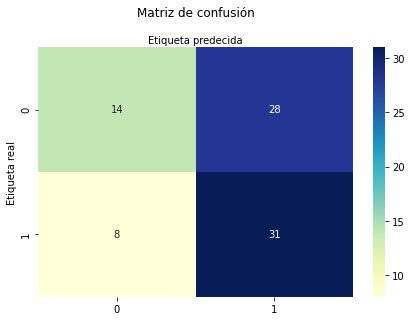

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Etiqueta real')
plt.xlabel('Etiqueta predecida');

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precisión:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5555555555555556
Precisión: 0.5254237288135594
Recall: 0.7948717948717948


In [24]:
## Máquina de soporte vectorial

feature_cols = ['moving_avg', 'uma10']
X = df_ml[feature_cols] # Variables explicativas
y = df_ml['etiqueta'] # Variable respuesta -1/1

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

clf = svm.SVC(kernel='linear') # Kernel lineal
#### <--- Nos falta hacer la selección del kernel y los hiperparámetros
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13, 29],
       [ 6, 33]])

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5679012345679012
Precision: 0.532258064516129
Recall: 0.8461538461538461


In [26]:
# Árbol de clasificación

clf_arbol = DecisionTreeClassifier()
## <--- Falta hacer la calibración de hiperparams: criterion="entropy", max_depth=3
clf_arbol = clf_arbol.fit(X_train,y_train)
y_pred = clf_arbol.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15, 27],
       [10, 29]])

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5432098765432098
Precision: 0.5178571428571429
Recall: 0.7435897435897436


In [28]:
# Random Forest

clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf = clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[14, 28],
       [16, 23]])

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.4567901234567901
Precision: 0.45098039215686275
Recall: 0.5897435897435898


In [30]:
# Vecinos más cercanos

clf_kn = KNeighborsClassifier(n_neighbors=3)
clf_kn = clf_kn.fit(X_train,y_train)
y_pred = clf_kn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18, 24],
       [14, 25]])

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5308641975308642
Precision: 0.5102040816326531
Recall: 0.6410256410256411


In [32]:
# AdaBoost

clf_ab = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
clf_ab = clf_ab.fit(X_train,y_train)
y_pred = clf_ab.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12, 30],
       [ 7, 32]])

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5432098765432098
Precision: 0.5161290322580645
Recall: 0.8205128205128205
